# Credit Card Fraud Detection

# - Data Preparation

## Load the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve, average_precision_score, confusion_matrix, classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


## Read the data

In [2]:
# read the data
data_fraud = pd.read_csv("/Users/karimaidrissi/Desktop/creditcardfrauddetection/creditcard.csv")

# dataset head
data_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# - Data exploration

In [3]:
# shape of the dataset
data_fraud.shape

(284807, 31)

- the dataset has 31 features, 28 of which have been anonymized from V1 through V28. The remaining 3 features are Time, Amount and the Class, where the class feature represent whether a transaction is frudulent or not.

In [4]:
# get the length of fraud and normal transactions:
fraud = data_fraud.loc[data_fraud["Class"] ==1] # using loc function to acess a row by label
normal = data_fraud.loc[data_fraud["Class"] ==0] # getting the normal transaction
print("Description of Fraud transaction")
print(fraud["Amount"].describe())
print("--------------------------------------")
print("Description of Normal transaction")
print(normal["Amount"].describe())

Description of Fraud transaction
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------
Description of Normal transaction
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


- Interesting, the informations shows that there'r 492 fraudulent transactions, whilst there'r 285,315 no-fraudulent transactions means that our dataset are highly unbalanced.
- We have also noticed that the average money transactions for Fraud transactions is more than Normal transactions.
- The maximum amount of Normal transaction is 25,691, while the Fraud transaction is only 2,125.

In [5]:
# summary of the Amount and Time:
data_fraud.loc[:,['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


- The dataset contains 284,807 transactions, the mean value of all credit card transaction is 88.45, while the largest value is 25,691$.

In [6]:
# The percentage of fraudulent and no-fraudulent transactions:
counts = data_fraud.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
percentage_normal = ( normal/ (normal+fraudulent))*100
percentage_fraudulent = ( fraudulent/ (normal+fraudulent))*100
print('- The percentage of fraudulent transaction is only ({:.3f}%), while the normal transaction is ({:.3f}%).'.format(percentage_fraudulent,percentage_normal))


- The percentage of fraudulent transaction is only (0.173%), while the normal transaction is (99.827%).


In [7]:
# checking the missing values
data_fraud.isnull().sum().sum()

0

- There's no missing value, so we can proceed to visualization part.

# - Data Visualization

Text(0.5, 1.0, 'Count of Fraudulent vs Normal Transactions \n (0: No Fraud || 1: Fraud)')

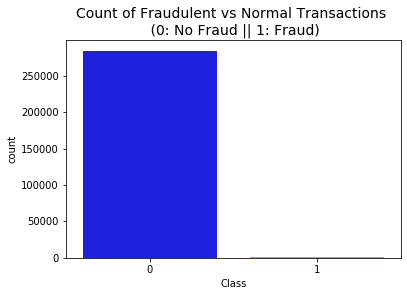

In [8]:
# plot the normal and the fraud transactions:
colors = ["blue", "orange"] # blue is fraud and orange is normal transaction.

sns.countplot('Class', data=data_fraud, palette=colors) 
plt.title('Count of Fraudulent vs Normal Transactions \n (0: No Fraud || 1: Fraud)', fontsize=14)

- From the graph we can confirm that the dataset is highly unbalanced which is common when dealing with fraudulent transactions. 

Exploring further the Time and Amount.

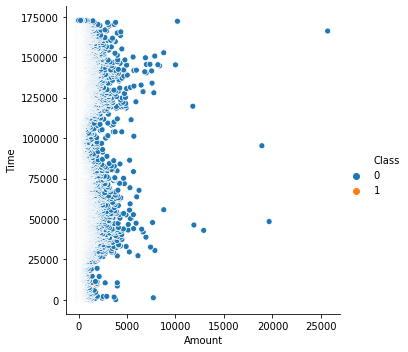

In [9]:
# plotting the amount vs time with hue Class
sns.relplot(x='Amount', y='Time', hue = 'Class',data=data_fraud)

          The distribution of the Amount vs Time 

- Since the total number of fraudulent transactions are only 492 we can barely see them in the plot.

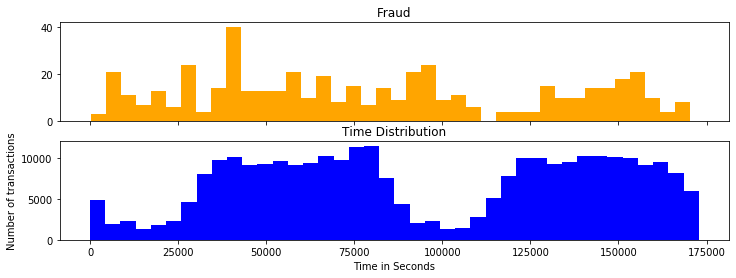

In [10]:
# plotting the time of the transactions vs Class either fraud or normal
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data_fraud.Time[data_fraud.Class == 1], bins = 40, color ='orange')
ax1.set_title("Fraud")

ax2.hist(data_fraud.Time[data_fraud.Class == 0], bins = 40, color = "blue")
ax2.set_title("No-Fraud")

plt.xlabel("Time in Seconds")
plt.ylabel("Number of transactions")
plt.title("Time Distribution")
plt.show()

- Both graphs look almost similar across both types of transactions. But, taking a closer look we can see that fraudulent transactions are uniformly distributed, whilst no-fraudulent transactions are cyclical distributed. which can be easy to use in order to detect the fraudulent transactions during a time.

- Since the transactions occured during two days only, we can assume that the significant drop down at approximately 100.000 second, occured during the night time.

- By looking at fraudulent graph, we can assume that most fraudulent transaction occured during the first hours of the day.

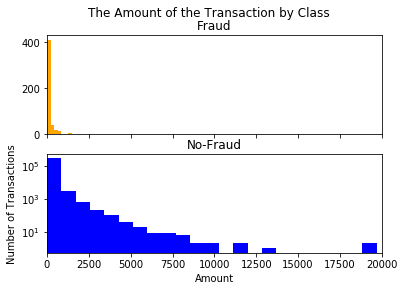

In [11]:
# The Amount vs Class distribution:
normal = data_fraud.loc[data_fraud["Class"] ==0]

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('The Amount of the Transaction by Class')
ax1.hist(fraud.Amount, bins =10, color ='orange')
ax1.set_title("Fraud")

ax2.hist(normal.Amount, bins = 30, color = "blue")
ax2.set_title("No-Fraud")

plt.xlabel("Amount")
plt.ylabel("Number of Transactions")
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

- From the plot , we can clearly see that most fraudulent transactions are less than 500$.

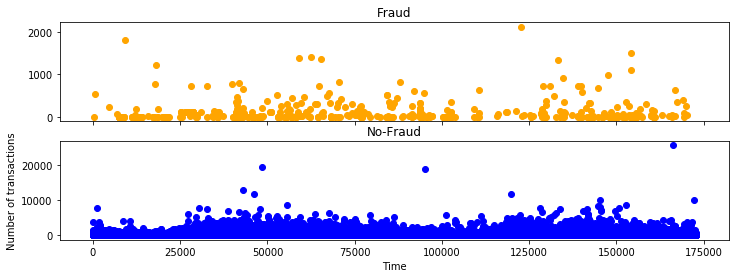

In [12]:
# plotting the time of the transactions vs Class vs Amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.scatter(data_fraud.Time[data_fraud.Class == 1], data_fraud.Amount[data_fraud.Class == 1], color ='orange')
ax1.set_title("Fraud")

ax2.scatter(data_fraud.Time[data_fraud.Class == 0], data_fraud.Amount[data_fraud.Class == 0],color = "blue")
ax2.set_title("No-Fraud")

plt.xlabel("Time")
plt.ylabel("Number of transactions")
plt.show()

- The graph don't show something interesting about the normal and fraud transactions.

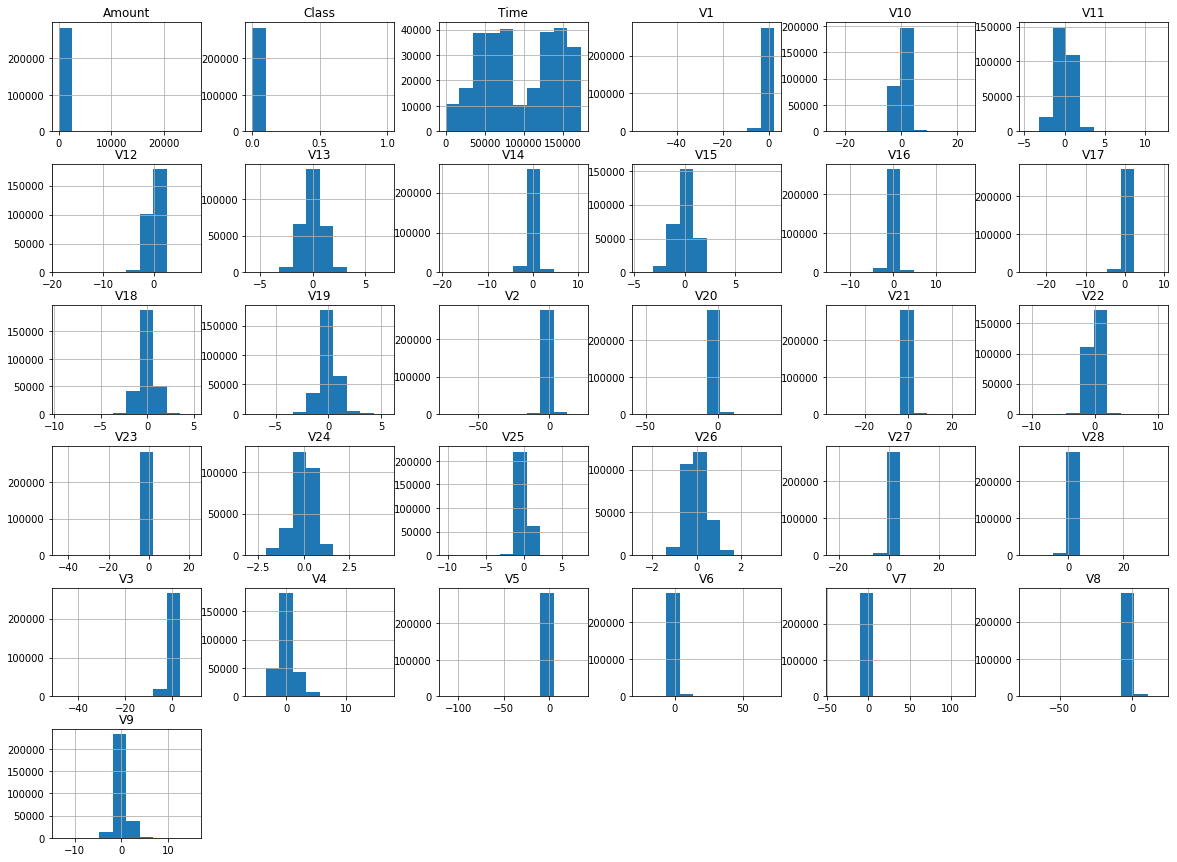

In [13]:
# plotting the histogram of each components in the dataset
data_fraud.hist(figsize=(20,15))
plt.show()

- As we can see that the distribution of the most PCA components is Gaussian. 

In [14]:
# correlation between all principle components:
correlation = data_fraud.corr()
correlation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


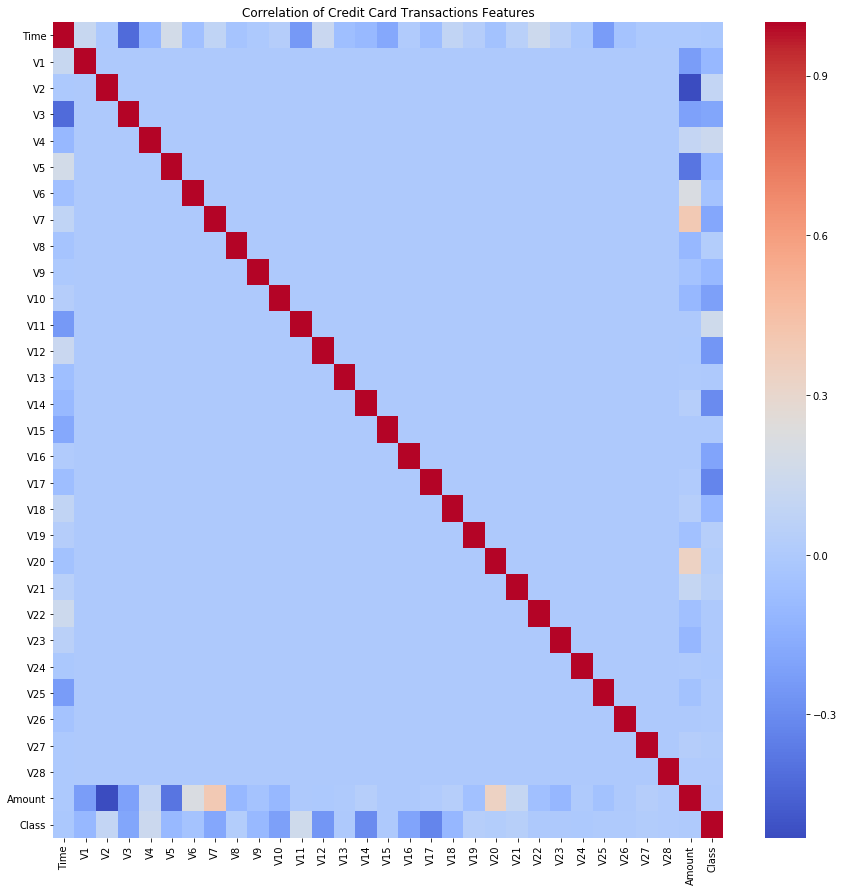

In [15]:
# Heatmap of the correlation matrix: 
plt.figure(figsize=(15,15))
plt.title('Correlation of Credit Card Transactions Features')
sns.heatmap(correlation,cmap='coolwarm')
plt.show()

- the above correlation shows that there is no correlation between all the principal component analysis V1 to V28, but there are some correlations between some features with the Amount. For example: V1, V2 and V5 are negatively correlated with the Amount feature, while V7, V20 and V6 are positively correlated with the Amount.


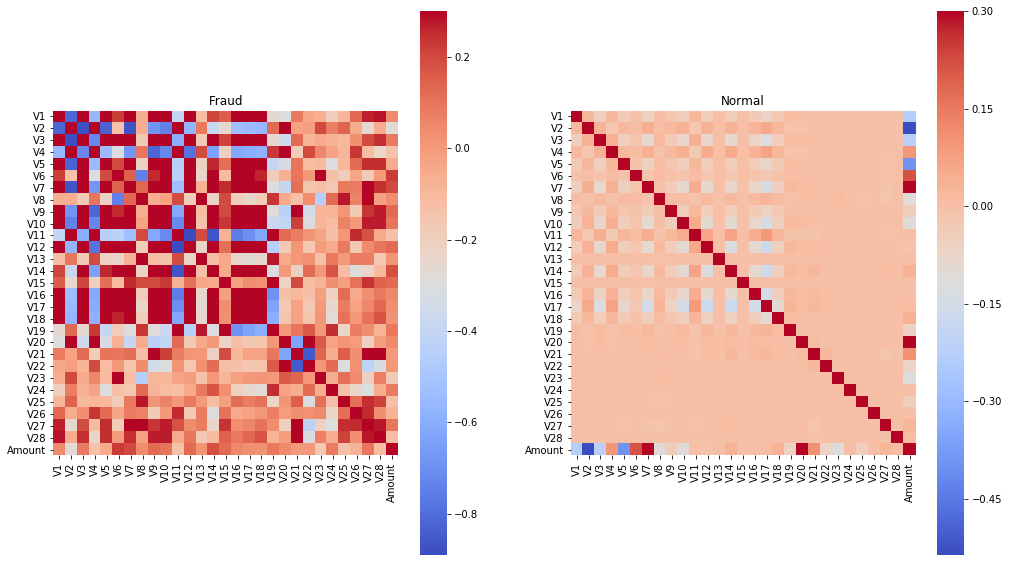

In [16]:
# Correlation Matrix by Class 
f,(ax1,ax2) = plt.subplots(1,2,figsize=(17,10))
sns.heatmap(data_fraud.query('Class==1').drop(["Class","Time"],1).corr(), vmax= .3, square=True, ax=ax1, cmap="coolwarm")
ax1.set_title('Fraud')

sns.heatmap(data_fraud.query('Class==0').drop(["Class","Time"],1).corr(), vmax= .3, square=True, ax=ax2, cmap="coolwarm");
ax2.set_title('Normal')
plt.show()

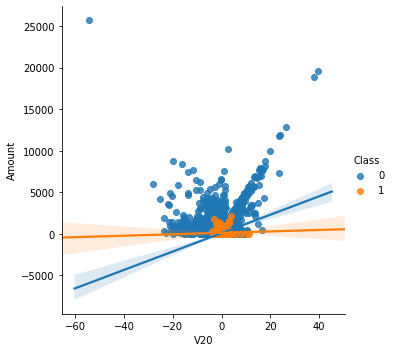

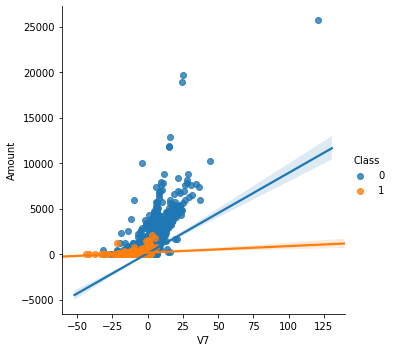

In [17]:
# plotting the correlation between (V20:Amount) and (V7:Amount) 
cor = sns.lmplot(x = 'V20', y = "Amount", data= data_fraud, hue = "Class", fit_reg =True)
cor = sns.lmplot(x = 'V7', y = "Amount", data= data_fraud, hue = "Class", fit_reg =True)
plt.show()

- We can conclude that the features are positively correlated.
- The Class=0 have a positive slope, while the regression line for Class=1 have less positive slope.

# Predicit the model

### Logistic Regression

#### Define the target and predictors values

In [18]:
# First define the target and predictors values
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']


#### Split the data in train, test, and validation set

In [19]:
# split the data into training and testing dataset
train_df,test_df = train_test_split(data_fraud,test_size=0.35, random_state=2020,shuffle=True)

train_df,validation_df = train_test_split(train_df, test_size=0.35, random_state =2020,shuffle=True)


#### Define the logistic Regression model

In [20]:
# define the logistic Regression classifier
log = linear_model.LogisticRegression(C=1e5)

#### Fit the model

In [21]:
# fit the model on training dataset
log.fit(train_df[predictors].values,train_df[target].values)

/Users/karimaidrissi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predict the target values

In [22]:
# predict the target values for validation_df using predict function
preds = log.predict(validation_df[predictors].values)

#### Confusion matrix

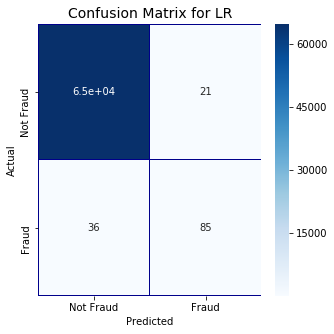

In [23]:
# visualizing the confusion matrix
cm = pd.crosstab(validation_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for LR', fontsize=14)
plt.show()


In [24]:
cm

Predicted,0,1
Actual,,
0,64652,21
1,36,85


In [25]:
# the accuracy score of the model
print(accuracy_score(validation_df[target].values, preds))

0.9991202889156403


In [26]:
# defining a python function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [27]:
# Calculate AUC-ROC curve in order to check the model performance
# AUC(Area Under the Curve)
# ROC(Receiver Operating characteristics)
auc = roc_auc_score(validation_df[target].values, preds)
print('AUC: %.2f' % auc)


AUC: 0.85


- The AUC-ROC score obtained using Logistic Regression is 85%

AUC-ROC Curve is one of the most commonly used metrics to evaluate the performance of machine learning algorithms, particulary in the case of imbalanced datasets

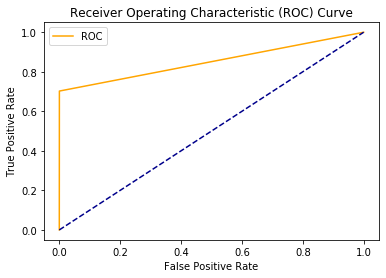

In [28]:
# get the ROC Curve
fpr, tpr, thresholds = roc_curve(validation_df[target].values, preds)
# plot ROC Curve using the defined function
plot_roc_curve(fpr,tpr)

### RandomForestClassifier

In [29]:
# intialize the randomforestclassifier
Rand = RandomForestClassifier(n_jobs=4,random_state=2018,criterion='gini',n_estimators=100,verbose=False)

In [30]:
# Fit the RandomForestClassifier
Rand.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

In [31]:
# predict the target values 
predict = Rand.predict(validation_df[predictors])

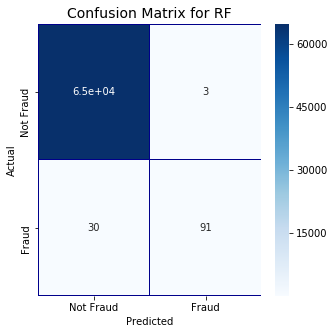

In [32]:
# confusion matrix

cm = pd.crosstab(validation_df[target].values, predict, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for RF', fontsize=14)
plt.show()

In [33]:
cm

Predicted,0,1
Actual,,
0,64670,3
1,30,91


In [34]:
# the accuracy score of the model
print(accuracy_score(validation_df[target].values, predict))


0.9994906935827391


In [35]:
# Calculate AUC-ROC curve in order to check the model performance
# AUC(Area Under the Curve)
# ROC(Receiver Operating characteristics)
roc_auc_score(validation_df[target].values, predict)

0.8760098642464895

- The ROC-AUC score obtained using RandomForrestClassifier is 88%

ROC curves are very useful graphical plot that illustrates the diagnostic ability of a binary classifier system. Even though, our dataset is very imbalanced, we will take a look at the ROC curve


In [36]:
# defining a python function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

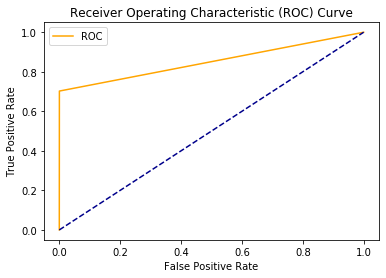

In [37]:
# get the ROC Curve
fpr, tpr, thresholds = roc_curve(validation_df[target].values, preds)

# plot ROC Curve using defined function
plot_roc_curve(fpr,tpr)

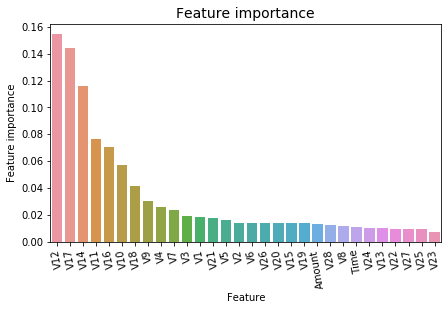

In [38]:
## Features importance

features = pd.DataFrame({'Feature':predictors, 'Feature importance': Rand.feature_importances_})

features = features.sort_values(by='Feature importance' , ascending=False)
plt.figure(figsize =(7,4))
plt.title("Feature importance", fontsize=14)
s = sns.barplot(x="Feature", y = "Feature importance", data = features)
s.set_xticklabels(s.get_xticklabels(),rotation=100)
plt.show()



- As we can see the most important features are V12,V17 and V14 which they corresponds to more than 50% of the total features.

### Decision Tree

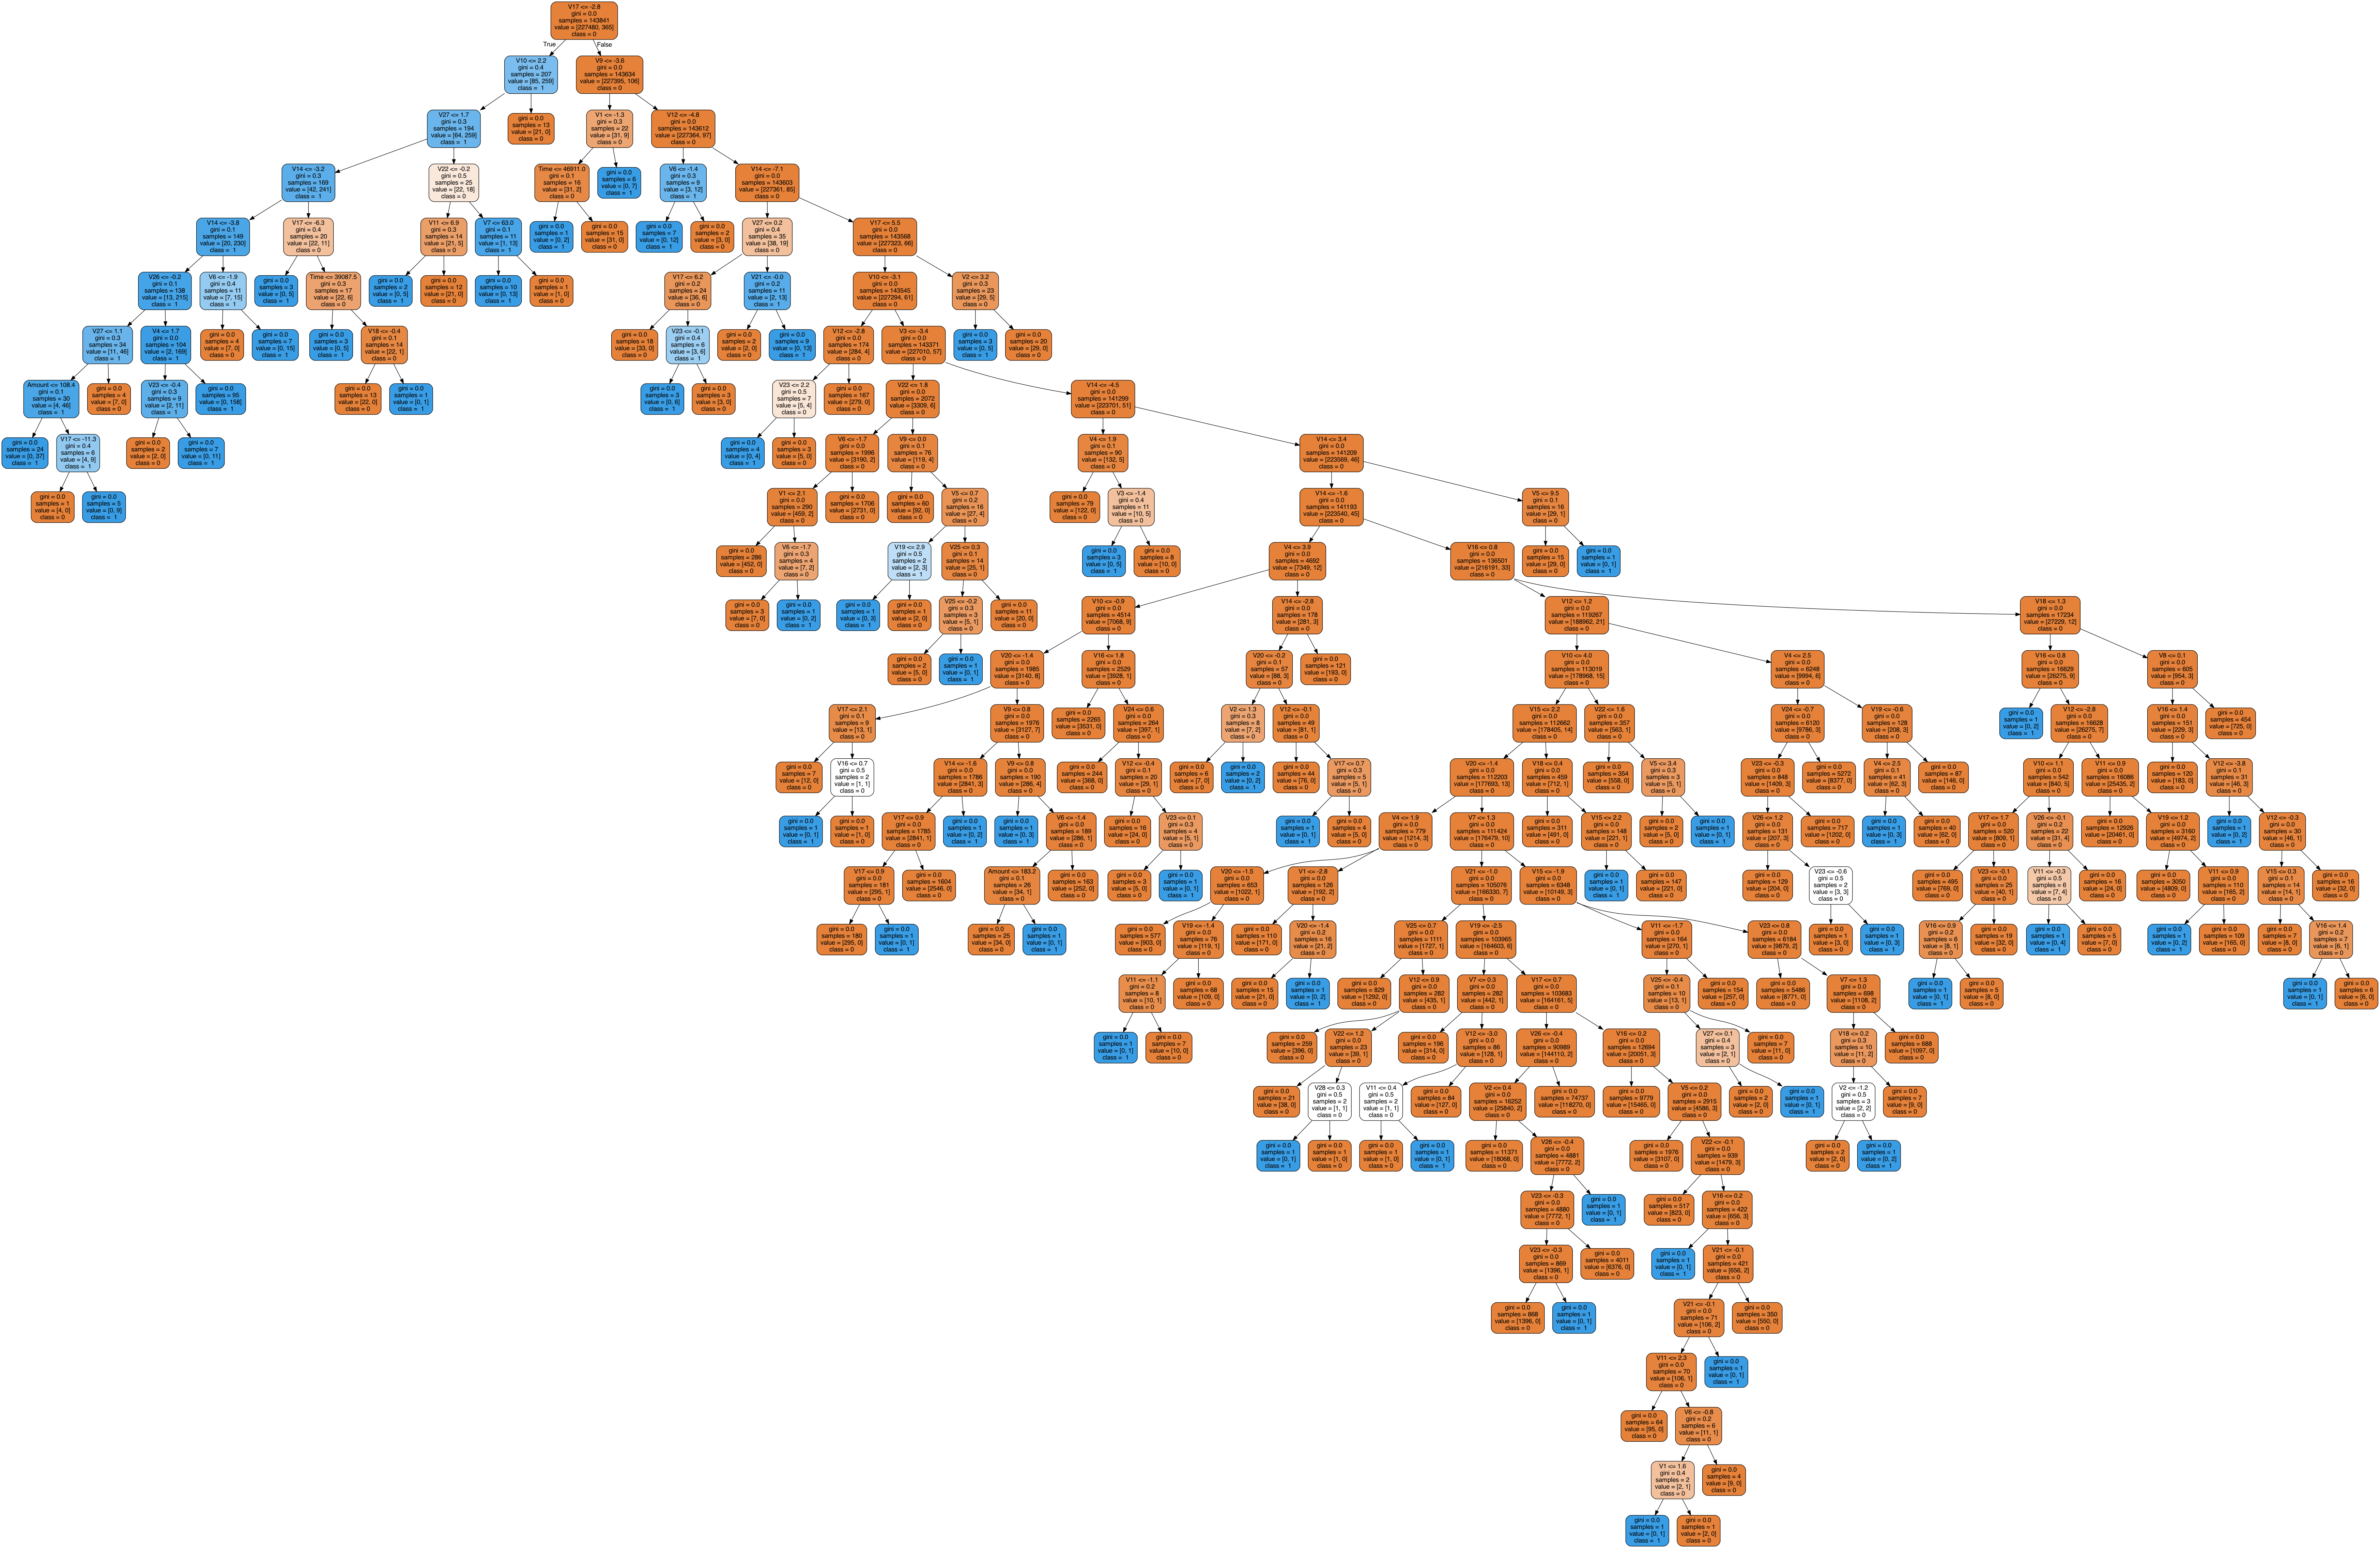

In [39]:
#visualizing a Single Decision Tree
# import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# instantiate model with 10 decision trees
model = RandomForestClassifier(n_estimators=10, random_state=40)

# Train the model on training dataset
model.fit(train_df[predictors],train_df[target])
# Extract single tree from the forest
estimator = model.estimators_[5]
X = data_fraud.drop('Class', axis=1)


# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 1, filled = True)

# use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# write graph to a png file
from IPython.display import Image

# write graph to a png file
Image(filename = 'tree.png')

### Building a model using Neural Network

In [40]:
# defining the sequential model
model = Sequential()

# adding layers
model.add(Dense(20, input_dim=30, activation = "relu")) # adding 20 inputs layers
model.add(Dense(20, activation = "relu")) # adding 20 hidden layers
model.add(Dense(1,  activation = "sigmoid")) # adding 1 output layer by using sigmoid function

# compiling the model 
model.compile(loss= "binary_crossentropy", optimizer = "adam", metrics =["accuracy"])

# fit the model on our training dataset
history = model.fit(train_df[predictors].values, train_df[target].values, validation_data=(validation_df[predictors].values,validation_df[target].values ), nb_epoch=10)

print("-----------------------------------------------")

# evaluate the model on our testing dataset
score = model.evaluate(test_df[predictors], test_df[target].values)

# viewing the accuracy acheived by test dataset
print("The model test accuracy is {}.".format(score[1]))



/Users/karimaidrissi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 120330 samples, validate on 64794 samples
Epoch 1/10
120330/120330 [==============================] - 9s 76us/step - loss: 9.2418 - accuracy: 0.9959 - val_loss: 6.1354 - val_accuracy: 0.9981
Epoch 2/10
120330/120330 [==============================] - 8s 69us/step - loss: 8.2153 - accuracy: 0.9963 - val_loss: 15.5811 - val_accuracy: 0.9981
Epoch 3/10
120330/120330 [==============================] - 6s 53us/step - loss: 5.8859 - accuracy: 0.9963 - val_loss: 1.6453 - val_accuracy: 0.9979
Epoch 4/10
120330/120330 [==============================] - 6s 49us/step - loss: 4.3562 - accuracy: 0.9962 - val_loss: 1.9591 - val_accuracy: 0.9979
Epoch 5/10
120330/120330 [==============================] - 8s 65us/step - loss: 2.3617 - accuracy: 0.9958 - val_loss: 1.7787 - val_accuracy: 0.9981
Epoch 6/10
120330/120330 [==============================] - 8s 66us/step - loss: 1.2052 - accuracy: 0.9962 - val_loss: 2.7315 - val_accuracy: 0.9981
Epoch 7/10
120330/120330 [============================

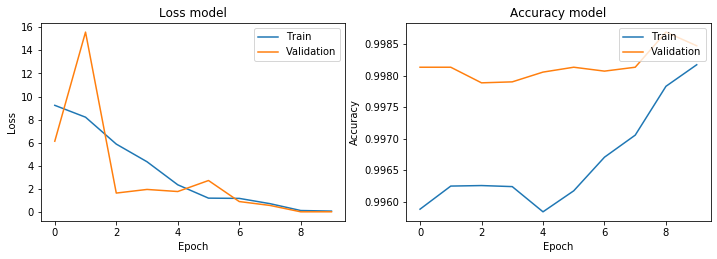

In [41]:
# plotting the accuracy and loss model
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss model")
plt.legend(["Train","Validation"], loc ="upper right")

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='auc_1')
plt.plot(history.history['val_accuracy'], label='val_auc_1')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy model")
plt.legend(["Train","Validation"], loc ="upper right")

- As we can see from the graphs, the model is accurate even after one epoch, and it improves to an accuracy of 99.80% after a few epochs.
- the loss model is going down after certain number of iterations.
- As we can from the accuracy score that the model is acheiving almost 100% which logical as the data is highly imbalanced. 
- To gather a better understanding of how the model is well performed. I will use the Average precision Score, which is an evaluation metric available in scikit learn. The precision score are always between 0 and 1, with a better model having a high score. 

In [42]:
# The average precision score 
predictions = model.predict_classes(test_df[predictors])
ap_score = average_precision_score(test_df[target], predictions)
print("The model test average precision score is {}.".format(ap_score))

The model test average precision score is 0.2816053931780069.


- As we can see from the average precision score that it didn't perform well, let's view the confusion matrix made by the model on test dataset to get a better insight. 

In [43]:
#Let's see how our model performed
print('\nClassification Report:')
print(classification_report(test_df[target], predictions))
print('\nConfusion Matrix:')
print(confusion_matrix(test_df[target], predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99529
           1       0.79      0.36      0.49       154

    accuracy                           1.00     99683
   macro avg       0.89      0.68      0.75     99683
weighted avg       1.00      1.00      1.00     99683


Confusion Matrix:
[[99514    15]
 [   99    55]]


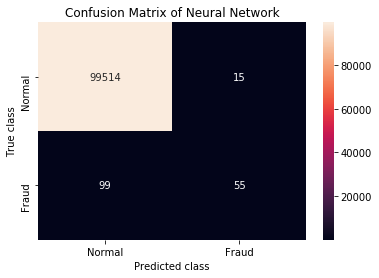

In [44]:
# Viewing the confusion matrix will give better insight about what type of error
LABELS = ["Normal","Fraud"]
confusion = pd.DataFrame(confusion_matrix(test_df[target], predictions))
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
sns.heatmap(confusion, xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d")
plt.title("Confusion Matrix of Neural Network")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()


- From the confusion matrix we can see clearly that neural network model able to identify 55 of 154 total of fraudulent transaction, and 15 were mistakenly marked as fraudulent. 

In [45]:
# evaluation of the model
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef

print("The model used is {}". format("Neural Network"))
acc= accuracy_score(test_df[target], predictions)
print("The accuracy is {}".format(acc))
prec= precision_score(test_df[target], predictions)
print("The precision is {}".format(prec))
rec= recall_score(test_df[target], predictions)
print("The recall is {}".format(rec))
f1= f1_score(test_df[target], predictions)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(test_df[target], predictions)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Neural Network
The accuracy is 0.9988563747078238
The precision is 0.7857142857142857
The recall is 0.35714285714285715
The F1-Score is 0.49107142857142855
The Matthews correlation coefficient is 0.529281621386439


- As we can see this model isn't doing that great as the data is highly unbalanced. 